In [2]:
from tensorflow.keras import datasets

In [3]:
mnist = datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

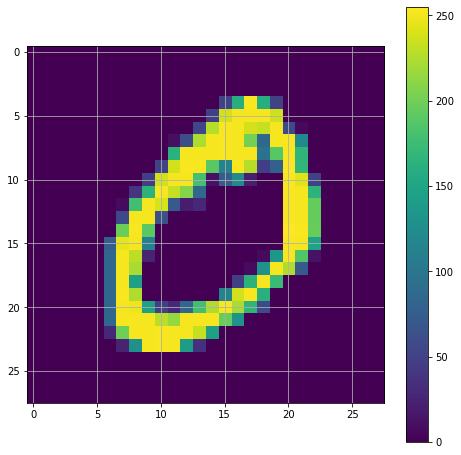

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(x_train[1])
plt.colorbar()
plt.grid()
plt.show()

In [9]:
x_train[...,tf.newaxis].shape

(60000, 28, 28, 1)

In [10]:
x_test[..., tf.newaxis].shape

(10000, 28, 28, 1)

In [11]:
np.min(x_train), np.max(x_train)

(0, 255)

In [12]:
np.min(x_test), np.max(x_test)

(0, 255)

In [13]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
x_train.dtype, x_test.dtype

(dtype('float64'), dtype('float64'))

In [15]:
print(list(filter(lambda x: x != 0, x_train[0].reshape(-1)))[:10])

[0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0]


In [16]:
print(list(filter(lambda x: x != 0, y_train.reshape(-1)))[:10])

[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]


In [17]:
# transpose는 tensor의 axis를 섞는 기능을 합니다.
# 해당 기능을 이용해서 (28, 140)을 작성하는 코드를 작성해보세요.
x_train[:5].transpose( (1, 0, 2) ).reshape(28, -1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

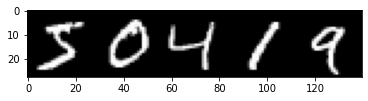

In [18]:
# (28, 140)의 이미지를 plt로 출력해보세요.
plt.imshow(x_train[:5].transpose( (1, 0, 2) ).reshape(28, -1), cmap='gray')
plt.show()

In [19]:
np.random.random((28,28)).shape

(28, 28)

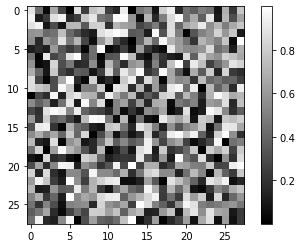

In [20]:
plt.imshow(np.random.random((28,28)), cmap='gray')
plt.colorbar()
plt.show()

In [21]:
print(np.random.normal(0.,1.,1))
print(np.random.normal(0.,1.,1))
print(np.random.normal(0.,1.,1))

[0.40466809]
[-0.62928755]
[-0.61140408]


In [22]:
print(np.random.normal(3.,0.01,1))
print(np.random.normal(3.,0.01,1))
print(np.random.normal(3.,0.01,1))

[3.00164066]
[2.99318422]
[2.99375688]


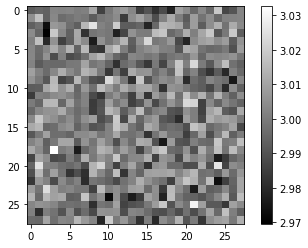

In [23]:
plt.imshow(np.random.normal(3., 0.01, (28,28)), cmap='gray')
plt.colorbar()
plt.show()

In [24]:
noisy_image = x_train[5] + np.random.normal(0.5, 0.1,(28,28))

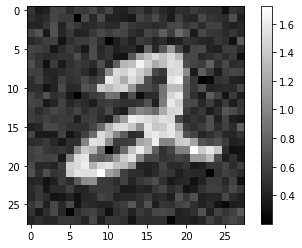

In [25]:
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()
plt.show()

In [26]:
np.max(noisy_image)

1.7203415405400444

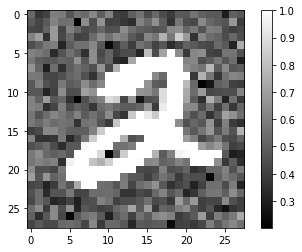

In [27]:
noisy_image[noisy_image > 1.0] = 1.0
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()
plt.show()

In [28]:
noise_x_train = x_train + np.random.normal(0.5, 0.1, x_train.shape)
noise_x_train[noise_x_train >1.0] = 1.0
noise_x_test = x_test + np.random.normal(0.5, 0.1, x_test.shape)
noise_x_test[noise_x_test >1.0] = 1.0

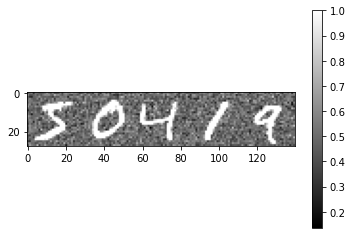

In [29]:
plt.imshow(noise_x_train[:5].transpose((1, 0, 2)).reshape(28,-1), cmap='gray')
plt.colorbar()
plt.show()

In [30]:
from tensorflow.keras.utils import to_categorical
print(y_train.shape, y_test.shape)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape, y_test.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


In [31]:
from tensorflow import keras

inputs = keras.layers.Input(shape=(28,28))
x1 = keras.layers.SimpleRNN(64, activation='tanh')(inputs)
x2 = keras.layers.Dense(10, activation='softmax')(x1)
model = keras.Model(inputs, x2)

In [32]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                5952      
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [34]:
hist = model.fit(noise_x_train, y_train, validation_data = (noise_x_test, y_test), epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 12s - loss: 0.7724 - acc: 0.7475 - val_loss: 0.5046 - val_acc: 0.8415
Epoch 2/5
1875/1875 - 12s - loss: 0.3973 - acc: 0.8787 - val_loss: 0.3622 - val_acc: 0.8890
Epoch 3/5
1875/1875 - 12s - loss: 0.3218 - acc: 0.9028 - val_loss: 0.3263 - val_acc: 0.9034
Epoch 4/5
1875/1875 - 12s - loss: 0.2850 - acc: 0.9148 - val_loss: 0.2470 - val_acc: 0.9263
Epoch 5/5
1875/1875 - 12s - loss: 0.2570 - acc: 0.9245 - val_loss: 0.2709 - val_acc: 0.9191


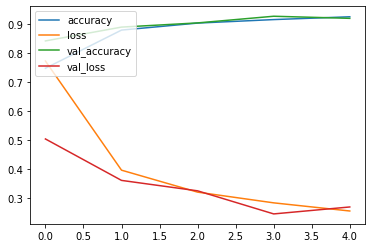

In [37]:
plt.plot(hist.history['acc'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_acc'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

In [38]:
res = model.predict(noise_x_test[3:4])
res.shape

(1, 10)

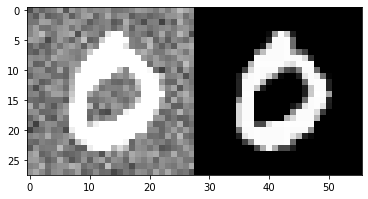

In [40]:
# test_noisy_images[0], test_images[0]를 width 방향으로 결합하여 (28, 28 * 2) 의 이미지를 만들어 plt로 출력하는 코드를 작성하세요.
plt.imshow(   np.concatenate([noise_x_test[3], x_test[3]], axis=1) , cmap="gray")
plt.show()

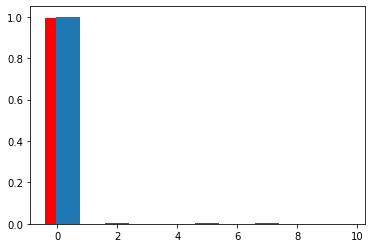

In [42]:
# res와 test_labels[0]의 결과를 plt.bar로 확인하세요.
plt.bar(range(10), res[0], color='red')
plt.bar(np.array(range(10)) + 0.35, y_test[3])
plt.show()

In [43]:
# 모델을 저장하는 코드를 작성하세요. 
model.save("./lecture_1.h5")

In [45]:
# 모델을 로드하는 코드를 작성하세요.
new_model = tf.keras.models.load_model('./lecture_1.h5')

In [46]:
# 로드한 모델을 test 데이터로 평가해보세요.
loss, acc = new_model.evaluate(noise_x_test, y_test, verbose=2)
print(loss, acc)
loss, acc = model.evaluate(noise_x_test, y_test, verbose=2)
print(loss, acc)

313/313 - 1s - loss: 0.2709 - acc: 0.9191
0.27086418867111206 0.9190999865531921
313/313 - 1s - loss: 0.2709 - acc: 0.9191
0.27086418867111206 0.9190999865531921


In [47]:
# 멀티모델 분류 - 인물 성별 표정

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image


warnings.filterwarnings('ignore')
%matplotlib inline

In [57]:
# tfds를 이용하여 데이터셋 사용하기
import tensorflow_datasets as tfds
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

In [65]:
celeb_a = tfds.load('celeb_a')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to C:\Users\admin\tensorflow_datasets\downloads\ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.e86598a53d084d3c94d2d7be3b1fb33f\ServiceLogin, has wrong checksum:
* Expected: UrlInfo(size=1.34 GiB, checksum='46fb89443c578308acf364d7d379fe1b9efb793042c0af734b6112e4fd3a8c74', filename='img_align_celeba.zip')
* Got: UrlInfo(size=89.00 KiB, checksum='81f7459dc4c308cac666af196bae63b529f47eaa1606d600b595311dc4c8b58b', filename='ServiceLogin')
To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

In [80]:
#만약에 위의 데이터를 받았다고 한다면 
celeb_a_train, celeb_a_test = celeb_a['validation'], celeb_a['test']

train_images = []
train_labels = []

for tensor in tfds.as_numpy(celeb_a_train):
    isMale = tensor['attributes']['Male']
    isSmiling = tensor['attributes']['Smiling']
    
    label = np.array([isMale, isSmiling]).astype(np.int8)
    
    img = tensor['image']
    

NameError: name 'celeb_a' is not defined

In [62]:
import imageio
from skimage.transform import resize

In [66]:
celeba_small = np.load('./celeba_small.npz')

In [67]:
x = celeba_small['train_images'][1]
y = celeba_small['train_labels'][1]

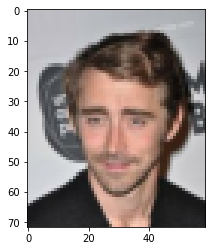

[1 1]


In [85]:
plt.imshow(x, cmap='gray')
plt.show()
print(y) # 0여자 1 남자 , 0 no smile 1 smile

In [69]:
x.shape, y.shape

((72, 59, 3), (2,))

In [70]:
x_train = celeba_small['train_images']
y_train = celeba_small['train_labels']
x_test = celeba_small['test_images']
y_test = celeba_small['test_labels']


In [73]:
#x_train에서 0이 아닌 값 출력  왜 0이 아닌거? 
x_train[x_train != 0] [:10]

array([0.02352941, 0.04313725, 0.05490196, 0.01960784, 0.03921569,
       0.05490196, 0.01977401, 0.03921569, 0.05114656, 0.02352941])

In [75]:
x_train.dtype, x_train.dtype.kind

(dtype('float64'), 'f')

In [78]:
print(np.min(x_train), np.max(x_train))
print(np.min(y_train), np.max(y_train))

0.0 1.0
0 1


In [79]:
y_train[0]

array([0, 0], dtype=int8)

In [82]:
from tensorflow.keras.utils import to_categorical

In [84]:
print(x_train.shape, x_test.shape)
print(y_train.dtype, y_test.dtype)


(2000, 72, 59, 3) (200, 72, 59, 3)
int8 int8


In [86]:
train_male_labels, train_smile_labels = np.split(y_train, 2, axis=1)
test_male_labels, test_smile_labels = np.split(y_test, 2, axis=1)
# print(train_male_labels.shape, train_smile_label.shape) # (2000, 1) (2000, 1)
# print(train_male_labels[0], train_smile_label[0]) # [0] [0]

# train_labels[0] # array([0, 0], dtype=int8)
# print(train_labels[0][0]) # 0

train_male_labels = to_categorical(train_male_labels)
train_smile_labels = to_categorical(train_smile_labels)
test_male_labels = to_categorical(test_male_labels)
test_smile_labels = to_categorical(test_smile_labels)

In [87]:
print(train_male_labels.shape)
print(train_smile_labels.shape)
print(test_male_labels.shape)
print(test_smile_labels.shape)

(2000, 2)
(2000, 2)
(200, 2)
(200, 2)


In [88]:
#원한 인코딩을 한 후에 레이블을 다시 만드는 과정 
train_labels2 = np.concatenate([ train_male_labels, train_smile_labels] , axis = 1)
test_labels2 = np.concatenate([ test_male_labels, test_smile_labels] , axis = 1)
print(train_labels2.shape, test_labels2.shape)

(2000, 4) (200, 4)


In [89]:
x_train[:5]

array([[[[0.02352941, 0.04313725, 0.05490196],
         [0.01960784, 0.03921569, 0.05490196],
         [0.01977401, 0.03921569, 0.05114656],
         ...,
         [0.03529412, 0.0547381 , 0.05865736],
         [0.03137255, 0.05490196, 0.05882353],
         [0.03137255, 0.05490196, 0.06663343]],

        [[0.02352941, 0.04313725, 0.05490196],
         [0.02352941, 0.03921569, 0.05490196],
         [0.01960784, 0.03921569, 0.05098039],
         ...,
         [0.03137255, 0.05490196, 0.05898693],
         [0.03137255, 0.05490196, 0.05882353],
         [0.03137255, 0.05490196, 0.06271186]],

        [[0.02352941, 0.04313725, 0.05490196],
         [0.02352941, 0.03948109, 0.05490196],
         [0.01960784, 0.03921569, 0.05098039],
         ...,
         [0.03163334, 0.05490196, 0.06291127],
         [0.03529412, 0.05490196, 0.05909586],
         [0.03140347, 0.05490196, 0.06271186]],

        ...,

        [[0.15206002, 0.25429314, 0.44316818],
         [0.11639757, 0.21470911, 0.43367259]

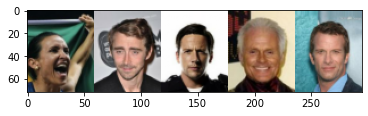

In [90]:
plt.imshow(np.hstack(x_train[:5]))
plt.show()


In [91]:
for i, label in enumerate(zip(train_male_labels, train_smile_labels)):
    if i == 5:
        break
    print(label)

(array([1., 0.], dtype=float32), array([1., 0.], dtype=float32))
(array([0., 1.], dtype=float32), array([0., 1.], dtype=float32))
(array([0., 1.], dtype=float32), array([1., 0.], dtype=float32))
(array([0., 1.], dtype=float32), array([0., 1.], dtype=float32))
(array([0., 1.], dtype=float32), array([0., 1.], dtype=float32))


In [93]:
df = pd.DataFrame(y_train, columns=['gender','smile'])
print(df.groupby(['gender', 'smile']).size())

gender  smile
0       0        499
        1        507
1       0        504
        1        490
dtype: int64
